# Project Overview

# Data Acquisition

### Sources
- Invasives
https://codes.ohio.gov/ohio-administrative-code/rule-901:5-30-01
- City Information
https://worldpopulationreview.com/us-cities/ohio/cuyahoga-county

### Required Imports

In [4008]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import folium
from folium.plugins import HeatMap
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

from IPython.display import display_html, display, HTML

### Loading Data

In [4009]:
df = pd.read_csv('Data/obs_species.csv', parse_dates=['observed_on'])

# Analysis

## Overall Native vs Non-Native Species

Number of native plant observations: 4423
Number of non-native plant observations: 3209


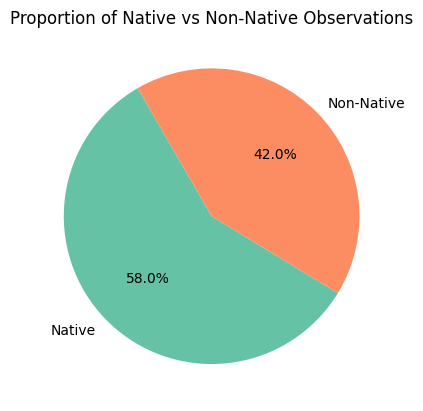

In [4010]:
native_counts = df['native'].value_counts().rename({True: 'Native', False: 'Non-Native'})

print(f'Number of native plant observations: {native_counts['Native']}')
print(f'Number of non-native plant observations: {native_counts['Non-Native']}')

colors = ['#66c2a5', '#fc8d62']

plt.pie(native_counts, labels=native_counts.index.astype(str), autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Proportion of Native vs Non-Native Observations");

## Most Common Native and Non-Native Species

In [4011]:
native_obs = df[df['native'] == True]
nonnative_obs = df[df['native'] == False]

native_obs_byspecies = native_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame(name='count')
nonnative_obs_byspecies = nonnative_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame(name='count')

top20_native = native_obs_byspecies.nlargest(20, 'count')
top20_nonnative = nonnative_obs_byspecies.nlargest(20, 'count')

df1_html = top20_native.to_html()
df2_html = top20_nonnative.to_html()
df1_title = "<h3 style='text-align: center;'>Top 10 Native Species Observed</h3>"
df2_title = "<h3 style='text-align: center;'>Top 10 Non-Native Species Observed</h3>"

display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_title}{df1_html}</div><div>{df2_title}{df2_html}</div></div>', raw=True)

Top 10 Native Species Observed 
 
 
 
 
 count 
 
 
 species 
 common_name 
 
 
 
 
 
 Ageratina altissima 
 White snakeroot 
 118 
 
 
 Verbesina alternifolia 
 Wingstem 
 112 
 
 
 Symphyotrichum novae-angliae 
 New england aster 
 93 
 
 
 Impatiens capensis 
 Common jewelweed 
 88 
 
 
 Solidago caesia 
 Bluestem goldenrod 
 85 
 
 
 Phytolacca americana 
 American pokeweed 
 79 
 
 
 Asclepias syriaca 
 Common milkweed 
 78 
 
 
 Eupatorium serotinum 
 Late boneset 
 70 
 
 
 Hibiscus moscheutos 
 Swamp rose mallow 
 66 
 
 
 Lobelia cardinalis 
 Cardinal flower 
 65 
 
 
 Persicaria virginiana 
 American jumpseed 
 61 
 
 
 Vernonia gigantea 
 Tall ironweed 
 60 
 
 
 Fagus grandifolia 
 American beech 
 59 
 
 
 Liriodendron tulipifera 
 Tulip tree 
 56 
 
 
 Verbena hastata 
 Blue vervain 
 50 
 
 
 Lobelia siphilitica 
 Great blue lobelia 
 48 
 
 
 Asclepias incarnata 
 Swamp milkweed 
 47 
 
 
 Eupatorium perfoliatum 
 Common boneset 
 47 
 
 
 Platanus occidentalis 
 American sycamore 
 46 
 
 
 Euthamia graminifolia 
 Flat-topped goldenrod 
 45 
 
 
 Top 10 Non-Native Species Observed 
 
 
 
 
 count 
 
 
 species 
 common_name 
 
 
 
 
 
 Tsuga canadensis 
 Eastern hemlock 
 104 
 
 
 Cichorium intybus 
 Chicory 
 79 
 
 
 Lonicera maackii 
 Amur honeysuckle 
 69 
 
 
 Ailanthus altissima 
 Tree-of-heaven 
 66 
 
 
 Solidago altissima 
 Tall goldenrod 
 54 
 
 
 Daucus carota 
 Wild carrot 
 53 
 
 
 Artemisia vulgaris 
 Common mugwort 
 46 
 
 
 Rosa multiflora 
 Multiflora rose 
 41 
 
 
 Frangula alnus 
 Alder buckthorn 
 36 
 
 
 Erechtites hieraciifolius 
 American burnweed 
 35 
 
 
 Solanum dulcamara 
 Bittersweet nightshade 
 35 
 
 
 Lythrum salicaria 
 Purple loosestrife 
 35 
 
 
 Cirsium vulgare 
 Bull thistle 
 31 
 
 
 Ampelopsis glandulosa 
 Porcelain berry 
 29 
 
 
 Cirsium arvense 
 Creeping thistle 
 28 
 
 
 Echinacea purpurea 
 Purple coneflower 
 27 
 
 
 Persicaria longiseta 
 Low smartweed 
 27 
 
 
 Potentilla indica 
 Mock strawberry 
 26 
 
 
 Reynoutria japonica 
 Japanese knotweed 
 25 
 
 
 Rosa canina 
 Dog-rose 
 24

In [4012]:
bottom20_native = native_obs_byspecies.nsmallest(100, 'count')
bottom20_nonnative = nonnative_obs_byspecies.nsmallest(100, 'count')

df1_html = bottom20_native.to_html()
df1_title = "<h3 style='text-align: center;'>Bottom 10 Native Species Observed</h3>"

#display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_title}{df1_html}</div>', raw=True)

## Most Common Invasive Species

In [4013]:
invasive_obs = df[df['invasive'] == True]

invasive_byspecies = invasive_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame('count')
display(invasive_byspecies.head(10))

count
species               common_name                
Lonicera maackii      Amur honeysuckle         69
Ailanthus altissima   Tree-of-heaven           66
Rosa multiflora       Multiflora rose          41
Lythrum salicaria     Purple loosestrife       35
Dipsacus fullonum     Wild teasel              21
Celastrus orbiculatus Oriental bittersweet     19
Dipsacus laciniatus   Cutleaf teasel           19
Rhamnus cathartica    Common buckthorn         17
Morus alba            White mulberry           13
Pyrus calleryana      Callery pear             12

## Observations By City

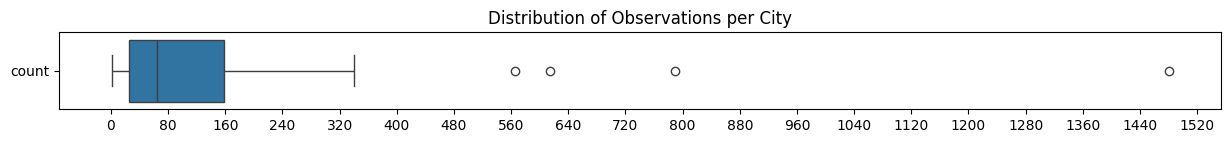

Summary statistics for observations by city


count
count    53.00
mean    144.00
std     243.61
min       1.00
25%      25.00
50%      65.00
75%     158.00
max    1480.00

In [4014]:
city_counts = df.groupby('City').size().to_frame(name='count')

plt.figure(figsize=(15, 1))
sns.boxplot(data=city_counts, orient='h')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=25))
plt.title('Distribution of Observations per City')

plt.show()

print('Summary statistics for observations by city')
display(city_counts.describe().round(2))

### Top 20 Cities for Observations and Observations per Sqr. Mile of Parks and Vacant Land

In [4015]:
city_counts = city_counts.merge(df[['City', 'park_acres', 'vacant_acres']].drop_duplicates(), on='City', how='left')
city_counts['obs_per_sqrmile'] = round(((city_counts['count']) * 100 /  (city_counts['park_acres'] + (0.5 + city_counts['vacant_acres']))) , 0)

top20_cities = city_counts.nlargest(20, 'count').reset_index(drop=True).drop(columns=['obs_per_sqrmile'])
top20_cities_normalized = city_counts.nlargest(20, 'obs_per_sqrmile').reset_index(drop=True)

df1_html = top20_cities.to_html()
df2_html = top20_cities_normalized.to_html()
df1_title = "<h3 style='text-align: center;'>Top 20 Cities by Count of Observations</h3>"
df2_title = "<h3 style='text-align: center;'>Top 20 Cities by Observations per Park/Vacant Acres</h3>"

display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_title}{df1_html}</div><div>{df2_title}{df2_html}</div></div>', raw=True)

Top 20 Cities by Count of Observations 
 
 
 
 City 
 count 
 park_acres 
 vacant_acres 
 
 
 
 
 0 
 Cleveland 
 1480 
 3094 
 6075 
 
 
 1 
 North Olmsted 
 790 
 807 
 375 
 
 
 2 
 Brecksville 
 615 
 4531 
 1306 
 
 
 3 
 Parma 
 565 
 907 
 614 
 
 
 4 
 Strongsville 
 340 
 2511 
 1306 
 
 
 5 
 Walton Hills 
 304 
 1740 
 415 
 
 
 6 
 Cleveland Heights 
 226 
 251 
 249 
 
 
 7 
 Mayfield 
 206 
 821 
 141 
 
 
 8 
 Shaker Heights 
 202 
 262 
 135 
 
 
 9 
 Brook Park 
 201 
 349 
 545 
 
 
 10 
 Bentleyville 
 178 
 640 
 187 
 
 
 11 
 Lakewood 
 178 
 244 
 67 
 
 
 12 
 Middleburg Heights 
 170 
 664 
 580 
 
 
 13 
 Solon 
 158 
 624 
 1169 
 
 
 14 
 Lyndhurst 
 155 
 206 
 143 
 
 
 15 
 Bay Village 
 146 
 216 
 67 
 
 
 16 
 Moreland Hills 
 140 
 514 
 327 
 
 
 17 
 Bedford 
 121 
 631 
 349 
 
 
 18 
 Fairview Park 
 114 
 704 
 37 
 
 
 19 
 Valley View 
 114 
 852 
 567 
 
 
 Top 20 Cities by Observations per Park/Vacant Acres 
 
 
 
 City 
 count 
 park_acres 
 vacant_acres 
 obs_per_sqrmile 
 
 
 
 
 0 
 University Heights 
 37 
 7 
 15 
 164.0 
 
 
 1 
 North Olmsted 
 790 
 807 
 375 
 67.0 
 
 
 2 
 Bratenahl 
 33 
 16 
 38 
 61.0 
 
 
 3 
 Lakewood 
 178 
 244 
 67 
 57.0 
 
 
 4 
 Bay Village 
 146 
 216 
 67 
 51.0 
 
 
 5 
 Shaker Heights 
 202 
 262 
 135 
 51.0 
 
 
 6 
 Cleveland Heights 
 226 
 251 
 249 
 45.0 
 
 
 7 
 Lyndhurst 
 155 
 206 
 143 
 44.0 
 
 
 8 
 Parma 
 565 
 907 
 614 
 37.0 
 
 
 9 
 Highland Heights 
 87 
 32 
 301 
 26.0 
 
 
 10 
 Beachwood 
 91 
 59 
 319 
 24.0 
 
 
 11 
 Bentleyville 
 178 
 640 
 187 
 22.0 
 
 
 12 
 Brook Park 
 201 
 349 
 545 
 22.0 
 
 
 13 
 Chagrin Falls 
 52 
 45 
 188 
 22.0 
 
 
 14 
 Mayfield 
 206 
 821 
 141 
 21.0 
 
 
 15 
 Newburgh Heights 
 17 
 42 
 42 
 20.0 
 
 
 16 
 Rocky River 
 57 
 156 
 137 
 19.0 
 
 
 17 
 Moreland Hills 
 140 
 514 
 327 
 17.0 
 
 
 18 
 Parma Heights 
 62 
 248 
 114 
 17.0 
 
 
 19 
 Cleveland 
 1480 
 3094 
 6075 
 16.0

### Number of/Proportion of Native Observations per City

In [4016]:

natives_by_city = df.groupby(['City', 'native']).size().to_frame(name='count')

natives_by_city_pivot = natives_by_city.reset_index().pivot_table(index='City', columns='native', values='count', fill_value=0).rename(columns={True: 'Native', False: 'Non-Native'})

merged = natives_by_city_pivot.merge(city_counts, on='City', how='left')

merged['normalized_native'] = round(
    (merged['Native'] * 100) / 
    ((merged['park_acres'] + (0.5 * merged['vacant_acres']))), 0
)

merged['percent_native'] = round((merged['Native'] / merged['count']) * 100,2)

merged= merged.sort_values(by=['percent_native', 'count'], ascending=False).rename(columns={'count': 'Total'}).reset_index(drop=True)

filtered_merged = merged[merged['Total']> 25] # Only showing cities with a sample size over the Q1 count of observations

display(filtered_merged.describe().drop(columns=['park_acres', 'vacant_acres']))

top20_nomalized_native = filtered_merged.sort_values(by='normalized_native', ascending=False).drop(columns=['park_acres', 'vacant_acres', 'obs_per_sqrmile', 'percent_native']).nlargest(20, 'normalized_native').reset_index(drop=True)
top_20_pct_native = filtered_merged.drop(columns=['park_acres', 'vacant_acres', 'obs_per_sqrmile', 'normalized_native']).nlargest(20, 'percent_native').reset_index(drop=True)

df1_html = top20_nomalized_native.to_html()
df2_html = top_20_pct_native.to_html()
df1_title = "<h3 style='text-align: center;'>Top 20 Cities by Native Observations Per Acre of Park/Vacant Acres</h2>"
df2_title = "<h3 style='text-align: center;'>Top 20 Cities by Percentage of Native Observations</h2>"

display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_title}{df1_html}</div><div>{df2_title}{df2_html}</div></div>', raw=True)

Non-Native      Native        Total  obs_per_sqrmile  \
count   38.000000   38.000000    38.000000        38.000000   
mean    81.684211  113.315789   195.000000        25.157895   
std    135.657977  149.233556   271.914931        29.008411   
min      9.000000   13.000000    29.000000         2.000000   
25%     24.000000   31.500000    58.250000         9.000000   
50%     49.500000   53.500000   114.000000        16.000000   
75%     72.250000  106.500000   195.250000        25.500000   
max    827.000000  653.000000  1480.000000       164.000000   

       normalized_native  percent_native  
count          38.000000       38.000000  
mean           19.447368       56.928158  
std            24.336267       11.767712  
min             1.000000       26.970000  
25%             8.000000       50.277500  
50%            11.500000       56.430000  
75%            23.750000       63.417500  
max           138.000000       83.010000

Top 20 Cities by Native Observations Per Acre of Park/Vacant Acres 
 
 
 
 City 
 Non-Native 
 Native 
 Total 
 normalized_native 
 
 
 
 
 0 
 University Heights 
 17.0 
 20.0 
 37 
 138.0 
 
 
 1 
 Bratenahl 
 9.0 
 24.0 
 33 
 69.0 
 
 
 2 
 North Olmsted 
 209.0 
 581.0 
 790 
 58.0 
 
 
 3 
 Lyndhurst 
 70.0 
 85.0 
 155 
 31.0 
 
 
 4 
 Shaker Heights 
 102.0 
 100.0 
 202 
 30.0 
 
 
 5 
 Bay Village 
 73.0 
 73.0 
 146 
 29.0 
 
 
 6 
 Cleveland Heights 
 121.0 
 105.0 
 226 
 28.0 
 
 
 7 
 Parma 
 247.0 
 318.0 
 565 
 26.0 
 
 
 8 
 Highland Heights 
 41.0 
 46.0 
 87 
 25.0 
 
 
 9 
 Chagrin Falls 
 19.0 
 33.0 
 52 
 24.0 
 
 
 10 
 Brook Park 
 61.0 
 140.0 
 201 
 23.0 
 
 
 11 
 Beachwood 
 47.0 
 44.0 
 91 
 20.0 
 
 
 12 
 Mayfield 
 35.0 
 171.0 
 206 
 19.0 
 
 
 13 
 Lakewood 
 130.0 
 48.0 
 178 
 17.0 
 
 
 14 
 Pepper Pike 
 14.0 
 15.0 
 29 
 17.0 
 
 
 15 
 Bentleyville 
 53.0 
 125.0 
 178 
 17.0 
 
 
 16 
 Rocky River 
 26.0 
 31.0 
 57 
 14.0 
 
 
 17 
 Parma Heights 
 21.0 
 41.0 
 62 
 13.0 
 
 
 18 
 Moreland Hills 
 56.0 
 84.0 
 140 
 12.0 
 
 
 19 
 Middleburg Heights 
 63.0 
 107.0 
 170 
 11.0 
 
 
 Top 20 Cities by Percentage of Native Observations 
 
 
 
 City 
 Non-Native 
 Native 
 Total 
 percent_native 
 
 
 
 
 0 
 Mayfield 
 35.0 
 171.0 
 206 
 83.01 
 
 
 1 
 North Olmsted 
 209.0 
 581.0 
 790 
 73.54 
 
 
 2 
 Bratenahl 
 9.0 
 24.0 
 33 
 72.73 
 
 
 3 
 Strongsville 
 99.0 
 241.0 
 340 
 70.88 
 
 
 4 
 Brecksville 
 182.0 
 433.0 
 615 
 70.41 
 
 
 5 
 Bentleyville 
 53.0 
 125.0 
 178 
 70.22 
 
 
 6 
 Brook Park 
 61.0 
 140.0 
 201 
 69.65 
 
 
 7 
 Walton Hills 
 102.0 
 202.0 
 304 
 66.45 
 
 
 8 
 Parma Heights 
 21.0 
 41.0 
 62 
 66.13 
 
 
 9 
 Chagrin Falls 
 19.0 
 33.0 
 52 
 63.46 
 
 
 10 
 Solon 
 58.0 
 100.0 
 158 
 63.29 
 
 
 11 
 Berea 
 24.0 
 41.0 
 65 
 63.08 
 
 
 12 
 Middleburg Heights 
 63.0 
 107.0 
 170 
 62.94 
 
 
 13 
 Gates Mills 
 27.0 
 43.0 
 70 
 61.43 
 
 
 14 
 Bedford 
 47.0 
 74.0 
 121 
 61.16 
 
 
 15 
 North Royalton 
 28.0 
 44.0 
 72 
 61.11 
 
 
 16 
 Moreland Hills 
 56.0 
 84.0 
 140 
 60.00 
 
 
 17 
 Olmsted Falls 
 15.0 
 22.0 
 37 
 59.46 
 
 
 18 
 Euclid 
 33.0 
 43.0 
 76 
 56.58 
 
 
 19 
 Parma 
 247.0 
 318.0 
 565 
 56.28

### Cities With the Most Invasive Species

In [4017]:
invasive_bycity =invasive_obs.groupby('City').size().sort_values(ascending=False).to_frame('count')
invasive_bycity = invasive_bycity.merge(filtered_merged[['City', 'Total']], on='City')

invasive_bycity['normalized_invasive'] = round(
    invasive_bycity['count'] /
    ((merged['park_acres'] + (0.5 * merged['vacant_acres']))) * 100, 0
    )

invasive_bycity['pct'] = round((invasive_bycity['count'] / invasive_bycity['Total']) * 100, 2)

top20_normalized_invasive = invasive_bycity.sort_values(by='normalized_invasive', ascending=False).drop(columns='pct').nlargest(20,'normalized_invasive').reset_index(drop=True)
top20_percent_native = invasive_bycity.drop(columns='normalized_invasive').nlargest(20, 'pct').reset_index(drop=True)

df1_html = top20_normalized_invasive.to_html()
df2_html = top20_percent_native.to_html()
df1_title = "<h3 style='text-align: center;'>Top 20 Cities by Invasive Observations Per Acre of Park/Vacant Acres</h2>"
df2_title = "<h3 style='text-align: center;'>Top 20 Cities by Percentage of Invasive Observations</h2>"

display(invasive_bycity.describe())

display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_title}{df1_html}</div><div>{df2_title}{df2_html}</div></div>', raw=True)

count        Total  normalized_invasive        pct
count   36.000000    36.000000            36.000000  36.000000
mean     9.833333   202.500000             7.833333   5.711667
std     17.010081   277.528017            29.574603   3.977956
min      1.000000    29.000000             0.000000   1.460000
25%      3.000000    60.750000             0.000000   3.257500
50%      6.000000   117.500000             1.000000   5.095000
75%      9.250000   201.250000             2.000000   6.252500
max    102.000000  1480.000000           176.000000  18.920000

Top 20 Cities by Invasive Observations Per Acre of Park/Vacant Acres 
 
 
 
 City 
 count 
 Total 
 normalized_invasive 
 
 
 
 
 0 
 Cleveland 
 102 
 1480 
 176.0 
 
 
 1 
 Cleveland Heights 
 12 
 226 
 34.0 
 
 
 2 
 Brecksville 
 35 
 615 
 20.0 
 
 
 3 
 South Euclid 
 2 
 45 
 14.0 
 
 
 4 
 Shaker Heights 
 12 
 202 
 5.0 
 
 
 5 
 North Olmsted 
 16 
 790 
 4.0 
 
 
 6 
 Beachwood 
 6 
 91 
 4.0 
 
 
 7 
 Parma Heights 
 3 
 62 
 2.0 
 
 
 8 
 Valley View 
 17 
 114 
 2.0 
 
 
 9 
 Parma 
 15 
 565 
 2.0 
 
 
 10 
 Berea 
 5 
 65 
 2.0 
 
 
 11 
 Strongsville 
 7 
 340 
 2.0 
 
 
 12 
 Brook Park 
 7 
 201 
 2.0 
 
 
 13 
 North Royalton 
 4 
 72 
 1.0 
 
 
 14 
 Euclid 
 3 
 76 
 1.0 
 
 
 15 
 Bay Village 
 3 
 146 
 1.0 
 
 
 16 
 Gates Mills 
 5 
 70 
 1.0 
 
 
 17 
 University Heights 
 2 
 37 
 1.0 
 
 
 18 
 Pepper Pike 
 1 
 29 
 1.0 
 
 
 19 
 Solon 
 5 
 158 
 1.0 
 
 
 Top 20 Cities by Percentage of Invasive Observations 
 
 
 
 City 
 count 
 Total 
 pct 
 
 
 
 
 0 
 Olmsted Falls 
 7 
 37 
 18.92 
 
 
 1 
 Independence 
 6 
 38 
 15.79 
 
 
 2 
 Valley View 
 17 
 114 
 14.91 
 
 
 3 
 Cuyahoga Heights 
 6 
 48 
 12.50 
 
 
 4 
 Berea 
 5 
 65 
 7.69 
 
 
 5 
 Gates Mills 
 5 
 70 
 7.14 
 
 
 6 
 Cleveland 
 102 
 1480 
 6.89 
 
 
 7 
 Broadview Heights 
 2 
 30 
 6.67 
 
 
 8 
 Beachwood 
 6 
 91 
 6.59 
 
 
 9 
 Fairview Park 
 7 
 114 
 6.14 
 
 
 10 
 Shaker Heights 
 12 
 202 
 5.94 
 
 
 11 
 Middleburg Heights 
 10 
 170 
 5.88 
 
 
 12 
 Lyndhurst 
 9 
 155 
 5.81 
 
 
 13 
 Brecksville 
 35 
 615 
 5.69 
 
 
 14 
 North Royalton 
 4 
 72 
 5.56 
 
 
 15 
 University Heights 
 2 
 37 
 5.41 
 
 
 16 
 Cleveland Heights 
 12 
 226 
 5.31 
 
 
 17 
 Westlake 
 4 
 78 
 5.13 
 
 
 18 
 Bentleyville 
 9 
 178 
 5.06 
 
 
 19 
 Bedford 
 6 
 121 
 4.96

### Native Biodiversity per City

In [4018]:
native_diversity_city = native_obs.groupby('City')['species'].nunique().sort_values(ascending=False).reset_index()
display(native_diversity_city.nlargest(10, 'species'))

City  species
0          Cleveland      198
1      North Olmsted      178
2        Brecksville      162
3              Parma      124
4       Strongsville      124
5       Walton Hills      107
6           Mayfield       87
7         Brook Park       79
8  Cleveland Heights       70
9       Bentleyville       62

### Maps of Native and Invasive Species

In [4019]:
map_center = [41.45, -81.66]  # Cleveland, OH

# Separate data into native and invasive observations
native_data = df[df['native'] == True][['latitude', 'longitude']].dropna().values.tolist()
invasive_data = df[df['invasive'] == True][['latitude', 'longitude']].dropna().values.tolist()

def add_species_markers(map_object, data, color, species_type):
    for _, row in data.dropna(subset=['latitude', 'longitude']).iterrows():
        popup_html = f"""<div style="font-size: 14px; color: #333; max-width: 200px;">
            <strong>Species:</strong> {row['species']}<br> <strong>Common Name:</strong> {row['common_name']}<br> <strong>Date Observed:</strong> {row['observed_on'].strftime('%Y-%m-%d')}
        </div>"""
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=1,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
            popup=folium.Popup(popup_html, max_width=250)
        ).add_to(map_object)

# Create maps and add markers using the function
native_map = folium.Map(location=map_center, zoom_start=10)
add_species_markers(native_map, df[df['native'] == True], 'green', 'Native Species')

invasive_map = folium.Map(location=map_center, zoom_start=10)
add_species_markers(invasive_map, df[df['invasive'] == True], 'red', 'Invasive Species')

# Display maps side by side
display(HTML(f"""
    <div style="display: flex; justify-content: space-around; gap: 30px; margin-bottom: 30px;">
        <div style="flex: 1;"> <h3 style="margin: 10px; text-align: center;">Native Species Map</h3> {native_map._repr_html_()} </div>
        <div style="flex: 1;"> <h3 style="margin: 10px; text-align: center;">Invasive Species Map</h3>{invasive_map._repr_html_()}</div>
    </div>
"""))

## Observations Per Month

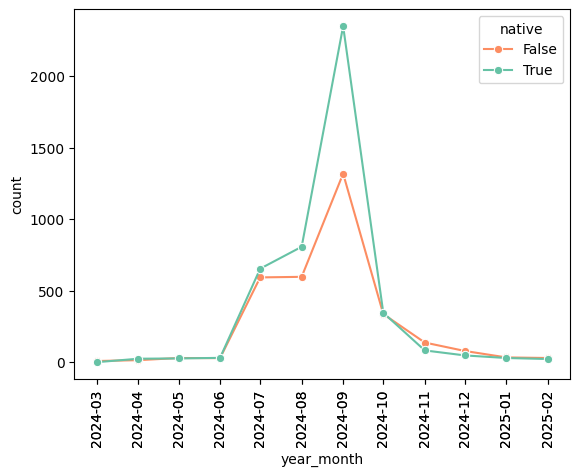

In [4020]:
df['year_month'] = df['observed_on'].dt.to_period('M').dt.to_timestamp()

monthly_counts = df.groupby(['year_month', 'native']).size().reset_index(name='count')

colors = ['#fc8d62', '#66c2a5']

sns.lineplot(data=monthly_counts, x='year_month', y='count', hue='native', palette=colors, marker='o')
plt.xticks(ticks=monthly_counts['year_month'], labels=monthly_counts['year_month'].dt.strftime('%Y-%m'), rotation=90)
plt.show()

### Low Engagment In Spring

Native species that bloom in the spring, like Erythronium americanum (Yellow Trout Lily), Geranium maculatum (Wild Geranium), and Arisaema triphyllum (Jack in the Pulpit), may be underrepresented due to low engagement with iNaturalist in the spring. 

## Observation Grade

In [4021]:
by_grade = df.groupby('quality_grade')['id'].count()
display(by_grade.to_frame('count'))

count
quality_grade       
casual           492
needs_id        2787
research        4353

In [4022]:
by_grade_native = df.groupby(['native', 'quality_grade'])['id'].count()

display(by_grade_native.to_frame('count'))

pct_research = round(by_grade.loc['research'] / len(df) * 100, 2)
pct_native_research = by_grade_native.loc[(True, "research")] / native_counts['Native']
pct_nonnative_research = by_grade_native.loc[(False, "research")] / native_counts['Non-Native']

print(f'Percent of all observations that are research grade: {pct_research}%')
print(f'Percent of native observations that are research grade: {round(pct_native_research * 100,2)}%')
print(f'Percent of non-native observations that are research grade: {round(pct_nonnative_research * 100,2)}%')

count
native quality_grade       
False  casual           399
       needs_id        1180
       research        1630
True   casual            93
       needs_id        1607
       research        2723

Percent of all observations that are research grade: 57.04%
Percent of native observations that are research grade: 61.56%
Percent of non-native observations that are research grade: 50.79%


### Checking for Statistical Significance of Research Grade Differences

In [4023]:
count = np.array([by_grade_native.loc[(True, 'research')], by_grade_native.loc[(False, 'research')]])
nobs = np.array([native_counts.loc['Native'], native_counts.loc['Non-Native']])

z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')

print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

Z-statistic: 9.382303897159542
P-value: 3.227331610114145e-21


## Native and Non-Native Observations Marked as Captive

In [4024]:
captive_counts = df['captive'].value_counts().to_frame(name='count')
display(captive_counts)

count
captive       
False     7172
True       460

In [4025]:
captive_native = df.groupby(['captive', 'native']).size().to_frame(name='count')
display(captive_native.loc[True])

pct_captive_native = round((captive_native.loc[(True, True), 'count'] / captive_counts.loc[True, 'count']) * 100, 2)
pct_notcaptive_native = round((captive_native.loc[(False, True), 'count'] / captive_counts.loc[False, 'count']) * 100, 2)

print(f'Percent native among those not marked captive: {pct_notcaptive_native}%')
print(f'Percent native among those marked captive: {pct_captive_native}%')

count
native       
False     382
True       78

Percent native among those not marked captive: 60.58%
Percent native among those marked captive: 16.96%


### Top Captive Species

In [4026]:
captive_obs = df[df['captive'] == True]
captive_native = captive_obs[captive_obs['native'] == True]

df1_html = captive_obs.groupby('species').size().sort_values(ascending=False).head(10).reset_index(name='count').to_html()
df2_html = captive_native.groupby('species').size().sort_values(ascending=False).head(10).reset_index(name='count').to_html()

df1_title = "<h3 style='text-align: center;'>Top 10 Captive Observations</h3>"
df2_title = "<h3 style='text-align: center;'>Top 10 Native Captive Observations</h3>"


display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_title}{df1_html}</div><div>{df2_title}{df2_html}</div></div>', raw=True)

Top 10 Captive Observations 
 
 
 
 species 
 count 
 
 
 
 
 0 
 Picea abies 
 15 
 
 
 1 
 Callicarpa dichotoma 
 15 
 
 
 2 
 Metasequoia glyptostroboides 
 14 
 
 
 3 
 Pinus strobus 
 14 
 
 
 4 
 Morella pensylvanica 
 13 
 
 
 5 
 Taxodium distichum 
 10 
 
 
 6 
 Picea pungens 
 9 
 
 
 7 
 Hydrangea quercifolia 
 9 
 
 
 8 
 Pinus resinosa 
 9 
 
 
 9 
 Cornus kousa 
 7 
 
 
 Top 10 Native Captive Observations 
 
 
 
 species 
 count 
 
 
 
 
 0 
 Pinus strobus 
 14 
 
 
 1 
 Rhus aromatica 
 7 
 
 
 2 
 Gleditsia triacanthos 
 6 
 
 
 3 
 Lobelia cardinalis 
 4 
 
 
 4 
 Lobelia siphilitica 
 3 
 
 
 5 
 Acer saccharinum 
 2 
 
 
 6 
 Coreopsis tinctoria 
 2 
 
 
 7 
 Physostegia virginiana 
 2 
 
 
 8 
 Symphyotrichum novae-angliae 
 2 
 
 
 9 
 Asimina triloba 
 2